In [1]:
import tensorflow.contrib.legacy_seq2seq

ModuleNotFoundError: No module named 'tensorflow.contrib.legacy_seq2seq'; 'tensorflow.contrib' is not a package

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
#import tensorflow.contrib.seq2seq 

#from tensorflow.contrib import legacy_seq2seq

from lib.metrics import masked_mae_loss
from model.dcrnn_cell import DCGRUCell

import tensorflow.contrib.legacy_seq2seq


from model.dcrnn_model import DCRNNModel
from model.dcrnn_supervisor import DCRNNSupervisor

n_f=7
n_node=106

info={'base_dir': 'data/model', 
      'log_level': 'INFO', 
      'data': {'batch_size': 4, 'dataset_dir': 'data/', 
               'test_batch_size': 4, 'val_batch_size': 4, 
               'graph_pkl_filename': 'data/sensor_graph/adj_mx_bay.pkl'},#not used? 
      'model': {'cl_decay_steps': 2000, 'filter_type': 'dual_random_walk', 
                'horizon': 12, 'input_dim': n_f, 'l1_decay': 0, 'max_diffusion_step': 2, 
                'num_nodes': n_node, 'num_rnn_layers': 2, 'output_dim': n_f, 'rnn_units': 64, 
                'seq_len': 12, 'use_curriculum_learning': True}, 
      'train': {'base_lr': 0.01, 'dropout': 0, 'epoch': 0, 'epochs': 100, 'epsilon': 0.001, 
                'global_step': 0, 'lr_decay_ratio': 0.1, 'max_grad_norm': 5, 'max_to_keep': 100, 
                'min_learning_rate': 2e-06, 'optimizer': 'adam', 'patience': 50, 'steps': [20, 30, 40, 50],
                'test_every_n_epochs': 10}}

import pickle
with open("data/sensor_graph/adj_mx.pkl", 'rb') as pickle_file:
    adj_mx = pickle.load(pickle_file)
adj_mx=adj_mx[2]
from lib.utils import StandardScaler

supervisor = DCRNNSupervisor(adj_mx=adj_mx, **info)

2020-01-06 09:45:12,300 - INFO - Log directory: data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/

2020-01-06 09:45:12,305 - INFO - {'base_dir': 'data/model', 'log_level': 'INFO', 'data': {'batch_size': 4, 'dataset_dir': 'data/', 'test_batch_size': 4, 'val_batch_size': 4, 'graph_pkl_filename': 'data/sensor_graph/adj_mx_bay.pkl'}, 'model': {'cl_decay_steps': 2000, 'filter_type': 'dual_random_walk', 'horizon': 12, 'input_dim': 7, 'l1_decay': 0, 'max_diffusion_step': 2, 'num_nodes': 106, 'num_rnn_layers': 2, 'output_dim': 7, 'rnn_units': 64, 'seq_len': 12, 'use_curriculum_learning': True}, 'train': {'base_lr': 0.01, 'dropout': 0, 'epoch': 0, 'epochs': 100, 'epsilon': 0.001, 'global_step': 0, 'lr_decay_ratio': 0.1, 'max_grad_norm': 5, 'max_to_keep': 100, 'min_learning_rate': 2e-06, 'optimizer': 'adam', 'patience': 50, 'steps': [20, 30, 40, 50], 'test_every_n_epochs': 10}}
2020-01-06 09:45:19,021 - INFO - ('x_train', (10793, 12, 106, 7))
2020-01-06 09:45:19,022 - INFO - ('y_train', 

In [3]:
with tf.Session() as sess:
    supervisor.train(sess=sess)


2020-01-06 09:45:43,299 - INFO - Start training ...

2020-01-06 09:49:22,041 - INFO - Epoch [0/100] (2699) train_mae: 5.7352, val_mae: 16.7719 lr:0.010000 218.4s
2020-01-06 09:49:22,499 - INFO - Val loss decrease from inf to 16.7719, saving to data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-16.7719-2699
2020-01-06 09:53:01,417 - INFO - Epoch [1/100] (5398) train_mae: 2.7757, val_mae: 16.5153 lr:0.010000 218.9s
2020-01-06 09:53:01,448 - INFO - Val loss decrease from 16.7719 to 16.5153, saving to data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-16.5153-5398
2020-01-06 09:56:39,230 - INFO - Epoch [2/100] (8097) train_mae: 2.1430, val_mae: 14.8314 lr:0.010000 217.8s
2020-01-06 09:56:39,257 - INFO - Val loss decrease from 16.5153 to 14.8314, saving to data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-14.8314-8097
2020-01-06 10:00:19,661 - INFO - Epoch [3/100] (10796) train_mae: 1.7655, val_mae: 18.0203 lr:0.010000 220.4s
2020-01-06 10:03:59,939 

2020-01-06 11:36:44,702 - INFO - Horizon 09, MAE: 1.52, MAPE: 3.0364, RMSE: 3.78
2020-01-06 11:36:44,716 - INFO - Horizon 10, MAE: 1.54, MAPE: 3.0168, RMSE: 3.81
2020-01-06 11:36:44,731 - INFO - Horizon 11, MAE: 1.55, MAPE: 3.0071, RMSE: 3.84
2020-01-06 11:36:44,746 - INFO - Horizon 12, MAE: 1.57, MAPE: 3.0099, RMSE: 3.86
2020-01-06 11:36:44,763 - INFO - Val loss decrease from 5.5187 to 5.4132, saving to data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-5.4132-80970
2020-01-06 11:40:25,060 - INFO - Epoch [30/100] (83669) train_mae: 0.4607, val_mae: 5.4575 lr:0.000100 220.3s
2020-01-06 11:44:05,169 - INFO - Epoch [31/100] (86368) train_mae: 0.4536, val_mae: 5.4701 lr:0.000100 220.1s
2020-01-06 11:47:43,635 - INFO - Epoch [32/100] (89067) train_mae: 0.4505, val_mae: 5.4709 lr:0.000100 218.5s
2020-01-06 11:51:21,137 - INFO - Epoch [33/100] (91766) train_mae: 0.4480, val_mae: 5.4535 lr:0.000100 217.5s
2020-01-06 11:55:01,869 - INFO - Epoch [34/100] (94465) train_mae: 0.4458, 

2020-01-06 14:04:26,505 - INFO - Epoch [69/100] (188930) train_mae: 0.4282, val_mae: 5.3770 lr:0.000002 219.9s
2020-01-06 14:04:56,138 - INFO - Horizon 01, MAE: 1.42, MAPE: 3.5023, RMSE: 3.63
2020-01-06 14:04:56,161 - INFO - Horizon 02, MAE: 1.43, MAPE: 3.4523, RMSE: 3.64
2020-01-06 14:04:56,182 - INFO - Horizon 03, MAE: 1.45, MAPE: 3.4262, RMSE: 3.67
2020-01-06 14:04:56,201 - INFO - Horizon 04, MAE: 1.47, MAPE: 3.2930, RMSE: 3.70
2020-01-06 14:04:56,219 - INFO - Horizon 05, MAE: 1.49, MAPE: 3.2171, RMSE: 3.73
2020-01-06 14:04:56,237 - INFO - Horizon 06, MAE: 1.51, MAPE: 3.1749, RMSE: 3.76
2020-01-06 14:04:56,254 - INFO - Horizon 07, MAE: 1.53, MAPE: 3.1529, RMSE: 3.80
2020-01-06 14:04:56,270 - INFO - Horizon 08, MAE: 1.54, MAPE: 3.1392, RMSE: 3.83
2020-01-06 14:04:56,287 - INFO - Horizon 09, MAE: 1.56, MAPE: 3.1294, RMSE: 3.86
2020-01-06 14:04:56,304 - INFO - Horizon 10, MAE: 1.57, MAPE: 3.1248, RMSE: 3.89
2020-01-06 14:04:56,321 - INFO - Horizon 11, MAE: 1.59, MAPE: 3.1229, RMSE: 3.9

In [4]:
info['train']['model_filename']

'data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-5.3707-105261'

In [5]:
with tf.Session() as sess:
    supervisor.load(sess, 'data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-5.3707-105261')
    outputs = supervisor.evaluate(sess)

INFO:tensorflow:Restoring parameters from data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_4_0106094512/models-5.3707-105261
2020-01-06 15:20:56,867 - INFO - Horizon 01, MAE: 1.42, MAPE: 3.4493, RMSE: 3.60
2020-01-06 15:20:56,894 - INFO - Horizon 02, MAE: 1.42, MAPE: 3.4726, RMSE: 3.60
2020-01-06 15:20:56,916 - INFO - Horizon 03, MAE: 1.44, MAPE: 3.4361, RMSE: 3.63
2020-01-06 15:20:56,937 - INFO - Horizon 04, MAE: 1.46, MAPE: 3.2933, RMSE: 3.66
2020-01-06 15:20:56,958 - INFO - Horizon 05, MAE: 1.48, MAPE: 3.2094, RMSE: 3.69
2020-01-06 15:20:56,978 - INFO - Horizon 06, MAE: 1.50, MAPE: 3.1558, RMSE: 3.73
2020-01-06 15:20:56,998 - INFO - Horizon 07, MAE: 1.51, MAPE: 3.1238, RMSE: 3.76
2020-01-06 15:20:57,018 - INFO - Horizon 08, MAE: 1.53, MAPE: 3.1002, RMSE: 3.79
2020-01-06 15:20:57,039 - INFO - Horizon 09, MAE: 1.54, MAPE: 3.0826, RMSE: 3.82
2020-01-06 15:20:57,058 - INFO - Horizon 10, MAE: 1.56, MAPE: 3.0705, RMSE: 3.85
2020-01-06 15:20:57,078 - INFO - Horizon 11, MAE: 1.57, MAPE: 3.0627, 

In [6]:
outputs['predictions'][0].shape

(3084, 106)

In [7]:
outputs['groundtruth'][0].shape

(3084, 106)

In [8]:
outputs.keys()

dict_keys(['predictions', 'groundtruth'])

In [9]:
len(outputs["predictions"])

12

In [10]:
len(outputs["groundtruth"])

12

In [ ]:
outputs["groundtruth"]

In [15]:
import numpy as np
y_true=np.array(outputs["groundtruth"])
print(y_true.shape)
y_true=np.transpose(y_true,(1,0,2))
print(y_true.shape)

y_true[0]

(12, 3084, 106)
(3084, 12, 106)


array([[   0.        ,   -0.16099697,   -0.321773  , ...,  -92.0562    ,
         -93.6342    ,  -94.5014    ],
       [   0.        ,   -0.16192505,   -0.323626  , ...,  -92.6302    ,
         -94.2157    ,  -95.0864    ],
       [   0.        ,   -0.162853  ,   -0.325479  , ...,  -93.2041    ,
         -94.7973    ,  -95.6714    ],
       ...,
       [   0.        ,   -0.16937602,   -0.338503  , ...,  -97.2431    ,
         -98.8846    ,  -99.77881   ],
       [   0.        ,   -0.170308  ,   -0.340362  , ...,  -97.8238    ,
         -99.4721    , -100.368996  ],
       [   0.        ,   -0.171233  ,   -0.34221   , ...,  -98.397705  ,
        -100.054     , -100.953995  ]], dtype=float32)

In [16]:
y_pred=np.array(outputs["predictions"])
print(y_pred.shape)
y_pred=np.transpose(y_pred,(1,0,2))
print(y_pred.shape)

y_pred[0]

(12, 3084, 106)
(3084, 12, 106)


array([[ -0.6274336 ,  -0.2199724 ,  -0.20482275, ..., -71.11469   ,
        -72.04192   , -76.14099   ],
       [ -0.5642456 ,  -0.18684274,  -0.19444388, ..., -71.456894  ,
        -72.35915   , -76.50566   ],
       [ -0.56845456,  -0.16392568,  -0.1925781 , ..., -71.95614   ,
        -72.97766   , -77.47817   ],
       ...,
       [ -0.68479383,  -0.12112218,  -0.26370576, ..., -76.53821   ,
        -78.05202   , -83.39851   ],
       [ -0.71776944,  -0.12963486,  -0.27697593, ..., -77.2462    ,
        -78.78012   , -84.1305    ],
       [ -0.7497548 ,  -0.14155996,  -0.29027897, ..., -78.01829   ,
        -79.566345  , -84.907295  ]], dtype=float32)

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation

node_loc=np.load('data/node_loc.npy')
#_node_signal=np.load('data/node_signal.npy')
#print(node_loc.shape,_node_signal.shape)
x=node_loc[:,0]
y=node_loc[:,1]
z=node_loc[:,2]

y_true_vis=y_true[-150:]
y_true_vis=y_true_vis[:,-1,:]

y_pred_vis=y_pred[-150:]
y_pred_vis=y_pred_vis[:,-1,:]
y_pred_vis.shape, y_true_vis.shape

Traceback (most recent call last):
  File "/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


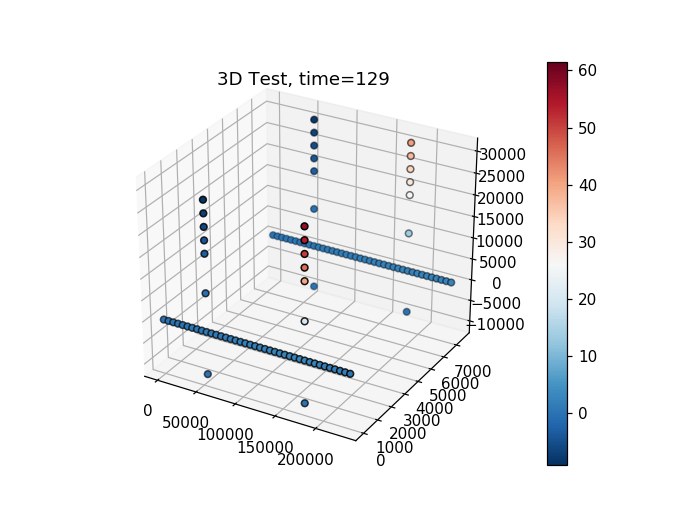

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [33]:
%matplotlib notebook

def update_graph(num):
    graph._offsets3d = (x,y,z)
    graph.set_array(y_true_vis[num,:])
    title.set_text('3D Test, time={}'.format(num))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

#i_f=6
graph = ax.scatter(x, y, z,c=y_true_vis[0,:], marker='o',
             vmin=np.min(y_true_vis[:,:]),vmax=np.max(y_true_vis[:,:]),
                  cmap=cm.RdBu_r,edgecolor="k")

ani = animation.FuncAnimation(fig, update_graph, 150,
                               interval=40, blit=False)
fig.colorbar(graph)

ani.save('images/results/true.gif')
plt.show() 

Traceback (most recent call last):
  File "/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/vislab/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


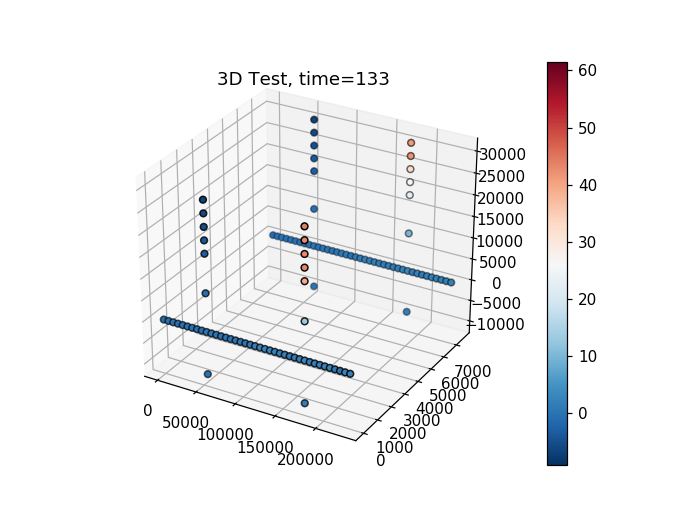

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [34]:
%matplotlib notebook

def update_graph(num):
    graph._offsets3d = (x,y,z)
    graph.set_array(y_pred_vis[num,:])
    title.set_text('3D Test, time={}'.format(num))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')

i_f=6
graph = ax.scatter(x, y, z,c=y_pred_vis[0,:], marker='o',
             vmin=np.min(y_true_vis[:,:]),vmax=np.max(y_true_vis[:,:]),
                  cmap=cm.RdBu_r,edgecolor="k")

ani = animation.FuncAnimation(fig, update_graph, 150,
                               interval=40, blit=False)
fig.colorbar(graph)

ani.save('images/results/pred.gif')
plt.show() 

In [35]:
y_pred_vis.shape

(150, 106)

In [48]:
for i in range(106):
    plt.plot(np.arange(150),y_pred_vis[:,i],label="pred")
plt.show()

<IPython.core.display.Javascript object>


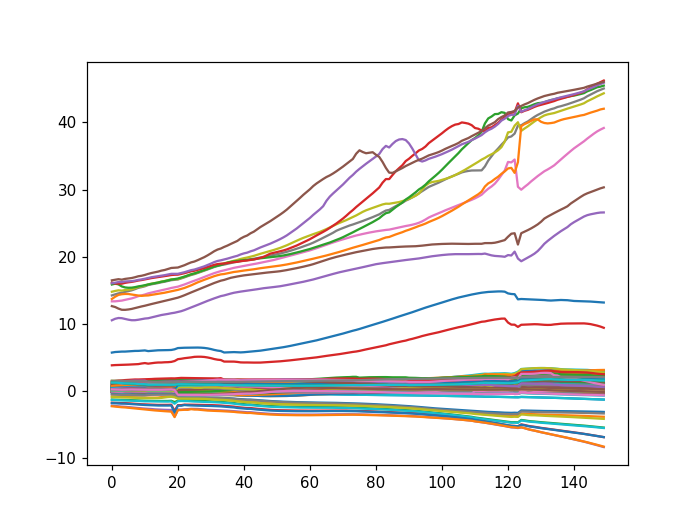

In [52]:
%matplotlib notebook

for i in range(106):
    plt.plot(np.arange(150),y_pred_vis[:,i],label="pred")
plt.show()

<IPython.core.display.Javascript object>


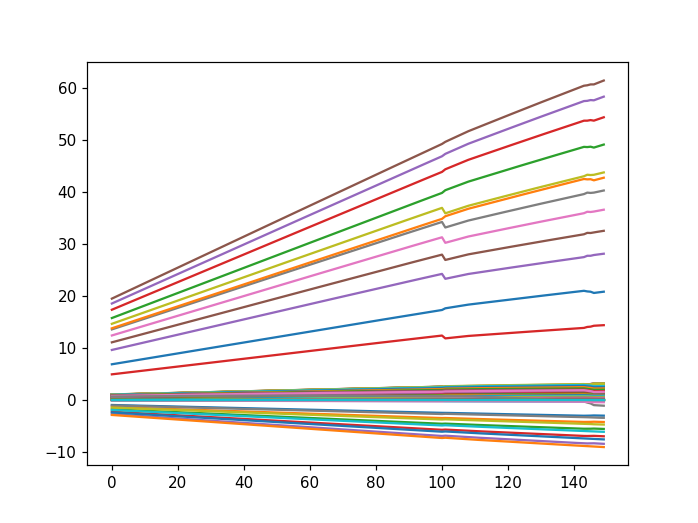

In [53]:
%matplotlib notebook

for i in range(106):
    plt.plot(np.arange(150),y_true_vis[:,i],label="pred")
plt.show()

%matplotlib notebook

plt.plot(np.arange(150),y_pred_vis[:,70],label="pred")
plt.plot(np.arange(150),y_true_vis[:,70],label="true")
plt.legend()
plt.show()